In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)

df['MedHouseVal'] = housing.target

In [22]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [24]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [25]:
df.shape

(20640, 9)

In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
print("Missing values of the set :")
print(df.isnull().sum())

Missing values of the set :
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [28]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


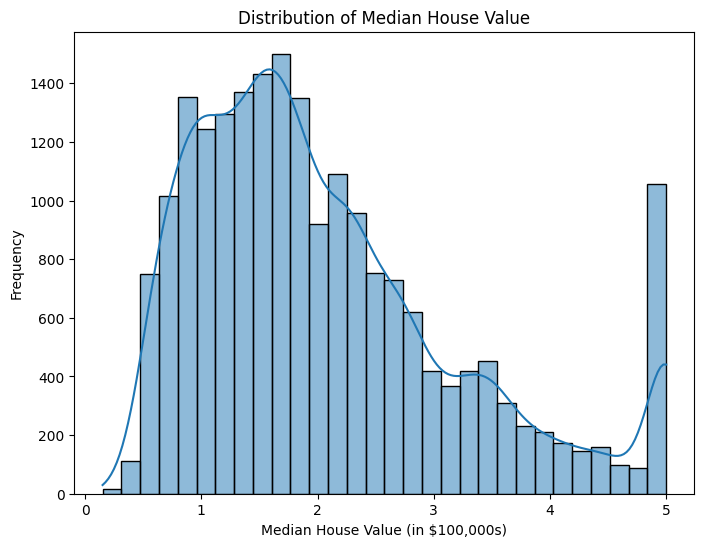

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value (in $100,000s)")
plt.ylabel("Frequency")
plt.show()

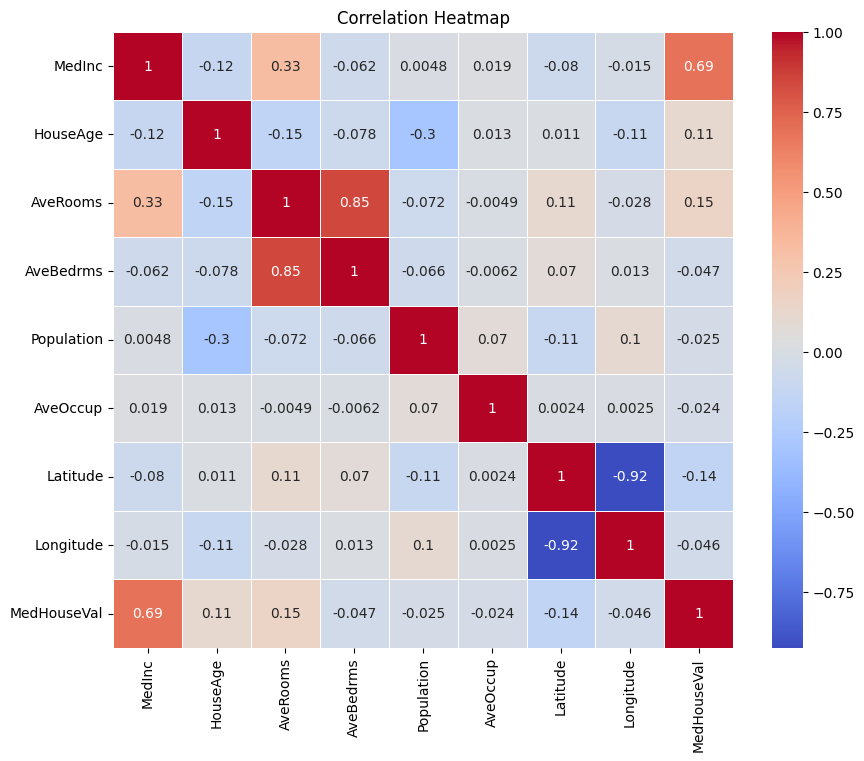

In [30]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

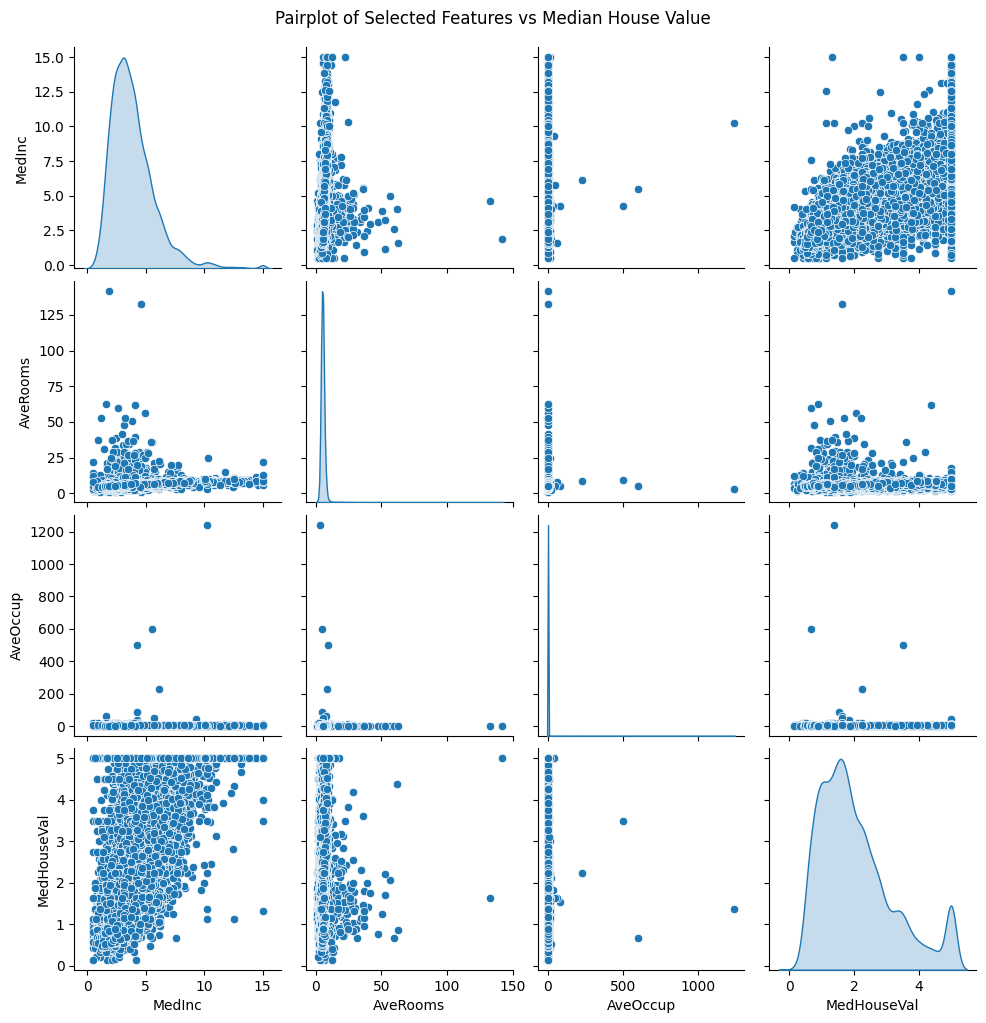

In [31]:
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal']], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features vs Median House Value", y=1.02)
plt.show()

In [34]:
income_bins = [0, 2, 4, 6, 8, 10, 12]
income_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12']
df['IncomeGroup'] = pd.cut(df['MedInc'], bins=income_bins, labels=income_labels)

In [35]:
avg_house_value = df.groupby('IncomeGroup')['MedHouseVal'].mean()

<ipython-input-35-25f3c689e3a8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_house_value = df.groupby('IncomeGroup')['MedHouseVal'].mean()


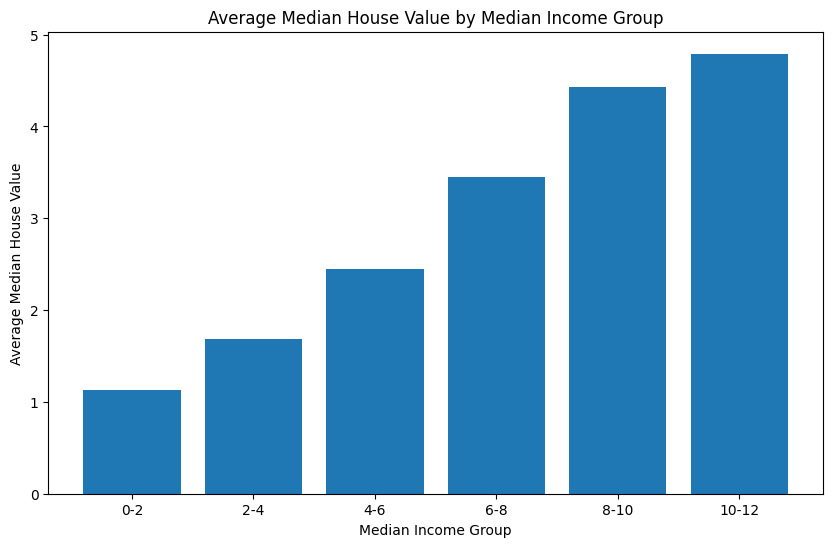

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(avg_house_value.index, avg_house_value.values)
plt.xlabel('Median Income Group')
plt.ylabel('Average Median House Value')
plt.title('Average Median House Value by Median Income Group')
plt.show()

In [37]:
income_counts = df['IncomeGroup'].value_counts()

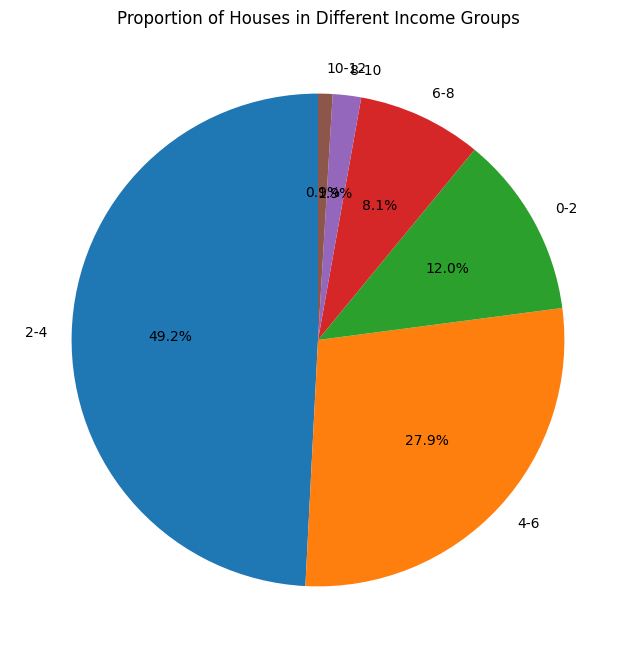

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Houses in Different Income Groups')
plt.show()